In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

In [88]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [84]:
# 한글 깨짐 문제 해결
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/NanumGothicCoding.ttf' # 나눔고딕코딩 사용, 나눔고딕에서 오류발생(!)
font = font_manager.FontProperties(fname=font_path).get_name() # 실제 설치된 폰트 이름조회
rc('font', family=font) # 한글깨짐현상 해결!!
rcParams['axes.unicode_minus'] = False # 한글 사용시 마이너스 표시 깨짐 해결!

In [70]:
# 차트 그릴때마다 계속 실행하면 한글깨짐이나 오류 현상 발생 가능성이 높음
sns.set_style('darkgrid')

In [71]:
bs_crime_2023 = pd.read_csv('./data/경찰청 부산광역시경찰청_경찰서별 5대 범죄 발생 현황_20230410.csv', encoding='UTF-8')

In [72]:
bs_crime_2023.head()

,연번,경찰서,구분,살인,강도,성범죄,절도,폭력
0,1,중부,경찰서,0,4,38,540,578
1,2,동래,경찰서,1,1,99,725,964
2,3,영도,경찰서,3,1,19,295,510
3,4,동부,경찰서,1,3,41,469,595
4,5,부산진,경찰서,6,3,222,1989,2318


In [73]:
bs_crime_2023.tail()

,연번,경찰서,구분,살인,강도,성범죄,절도,폭력
10,11,사하,경찰서,6,3,65,628,1073
11,12,연제,경찰서,2,2,92,822,1337
12,13,강서,경찰서,3,1,32,318,442
13,14,북부,경찰서,1,1,45,939,848
14,15,기장,경찰서,2,1,43,463,587


In [74]:
bs_crime_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연번      15 non-null     int64 
 1   경찰서     15 non-null     object
 2   구분      15 non-null     object
 3   살인      15 non-null     int64 
 4   강도      15 non-null     int64 
 5    성범죄    15 non-null     int64 
 6   절도      15 non-null     int64 
 7   폭력      15 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 1.1+ KB


In [75]:
bs_crime_2023['합계'] = bs_crime_2023['살인']+bs_crime_2023['강도']+bs_crime_2023[' 성범죄']+bs_crime_2023['절도']+bs_crime_2023['폭력']

del bs_crime_2023['연번']
del bs_crime_2023['구분']

bs_crime_2023.head()

,경찰서,살인,강도,성범죄,절도,폭력,합계
0,중부,0,4,38,540,578,1160
1,동래,1,1,99,725,964,1790
2,영도,3,1,19,295,510,828
3,동부,1,3,41,469,595,1109
4,부산진,6,3,222,1989,2318,4538


In [76]:
bs_crime_2023.columns

Index(['경찰서', '살인', '강도', ' 성범죄', '절도', '폭력', '합계'], dtype='object')

In [77]:
bs_crime_2023 = bs_crime_2023.set_index('경찰서')
bs_crime_2023

,살인,강도,성범죄,절도,폭력,합계
경찰서,,,,,,
중부,0,4,38,540,578,1160
동래,1,1,99,725,964,1790
영도,3,1,19,295,510,828
동부,1,3,41,469,595,1109
부산진,6,3,222,1989,2318,4538
서부,2,1,25,454,440,922
남부,3,3,105,887,1405,2403
해운대,3,6,153,1333,1531,3026
사상,6,1,81,841,1003,1932


In [79]:
bs_crime_sum = bs_crime_2023['합계']

In [81]:
bs_crime_sum = pd.DataFrame(bs_crime_sum)
bs_crime_sum

,합계
경찰서,
중부,1160
동래,1790
영도,828
동부,1109
부산진,4538
서부,922
남부,2403
해운대,3026
사상,1932


<Axes: xlabel='경찰서'>

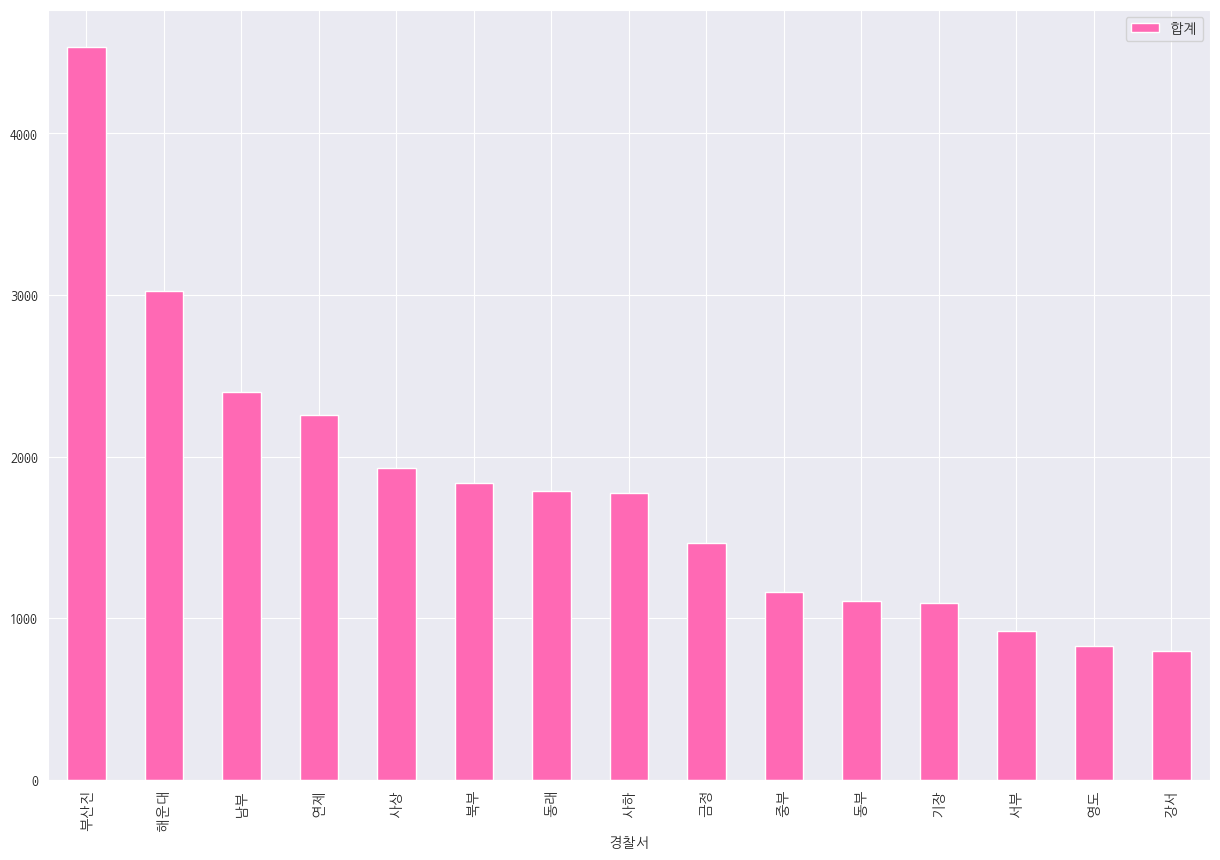

In [92]:
# 부산 5대범죄 막대그래프 비교
crime_sort = bs_crime_sum.sort_values('합계', ascending = False)

crime_sort.plot.bar(figsize=(15, 10), color='hotpink')

In [93]:
crime_murder = bs_crime_2023['살인']
crime_murder = pd.DataFrame(crime_murder)
crime_murder

,살인
경찰서,
중부,0
동래,1
영도,3
동부,1
부산진,6
서부,2
남부,3
해운대,3
사상,6


In [94]:
crime_robber = bs_crime_2023['강도']
crime_robber = pd.DataFrame(crime_robber)
crime_robber

,강도
경찰서,
중부,4
동래,1
영도,1
동부,3
부산진,3
서부,1
남부,3
해운대,6
사상,1


In [95]:
crime_sex = bs_crime_2023[' 성범죄']
crime_sex = pd.DataFrame(crime_sex)
crime_sex

,성범죄
경찰서,
중부,38
동래,99
영도,19
동부,41
부산진,222
서부,25
남부,105
해운대,153
사상,81


In [96]:
crime_violence = bs_crime_2023['폭력']
crime_violence = pd.DataFrame(crime_violence)
crime_violence

,폭력
경찰서,
중부,578
동래,964
영도,510
동부,595
부산진,2318
서부,440
남부,1405
해운대,1531
사상,1003


In [97]:
crime_theft = bs_crime_2023['절도']
crime_theft = pd.DataFrame(crime_theft)
crime_theft

,절도
경찰서,
중부,540
동래,725
영도,295
동부,469
부산진,1989
서부,454
남부,887
해운대,1333
사상,841


In [100]:
merge_1 = pd.merge(crime_murder,crime_robber, on='경찰서')
merge_2 = pd.merge(crime_sex,crime_violence, on='경찰서')

In [102]:
merge_3 = pd.merge(merge_1, merge_2, on='경찰서')
merge_4 = pd.merge(crime_theft, bs_crime_sum, on = '경찰서')
result = pd.merge(merge_3, merge_4, on='경찰서')

result

,살인,강도,성범죄,폭력,절도,합계
경찰서,,,,,,
중부,0,4,38,578,540,1160
동래,1,1,99,964,725,1790
영도,3,1,19,510,295,828
동부,1,3,41,595,469,1109
부산진,6,3,222,2318,1989,4538
서부,2,1,25,440,454,922
남부,3,3,105,1405,887,2403
해운대,3,6,153,1531,1333,3026
사상,6,1,81,1003,841,1932
